# Regressão Logística
## Uma construção intuitiva baseada em regressão linear

Vimos em regressão linear como explicar uma variável quantitativa Y por meio de uma matrix de dados X de forma que $Y = \underset{\sim}{\hat{\beta}}*\underset{\sim}{X} + \underset{\sim}{\epsilon}$, sendo que $Y \sim N\left(\underset{\sim}{\hat{\beta}}*\underset{\sim}{X}, \sigma^2\right)$

<img src = "../imgs/reg_lin_eq.png" width = "50%"></img>

mas e quando temos uma variável dependente indicando ação? 

por exemplo.: 
- Comprar um item
- Ser cliente
- Abandonar a empresa
- Dar default em linha de crédito ou sinistro de veículo
- Processar uma instituição

ou seja, quando olhamos os dados coletamos vemos de forma gráfica o seguinte

<img src = "../imgs/reg_log_bin.png" width = "50%"></img>

Neste caso notamos que a proporção $p$ de pessoas que, por exemplo, compram um carro, tende a aumentar conforme a idade aumenta, pois o volume de pontos em 1 aumenta.

Porderíamos tentar usar a regressão linear para esplicar o fenomeno e teríamos a seguinte reta ajustada.

<img src = "../imgs/reg_log_bin_line.png" width = "50%"></img>

Porém nossos valores são limitados no eixo Y, dado que assumem apenas os valores 0 ou 1, e portanto permitir valores além desses extremos não faz sentido. Apartir disso poderíamos truncar esses valores de forma a obter o seguinte ajuste.

<img src = "../imgs/reg_log_bin_line_trunc.png" width = "50%"></img>

Sendo que

$$
Y =
  \begin{cases}
    0       & \quad \forall x \ | \ \beta_0 + \beta_1*X & \in (-\infty;0) \\
    \beta_0 + \beta_1*X & \quad \forall x \ | \ \beta_0 + \beta_1*X & \in [0;1] \\
    1       & \quad \forall x \ |\  \beta_0 + \beta_1*X & \in (1; \infty)
  \end{cases}
$$

Note a dificuldade em se escrever Y nessa situação e como que essa função perde propridades importantes como continuidade. Além disso o meio da reta ainda não parece se ajustar muito bem, de forma que o ideal seriamos traçar uma curva como a seguinte:

<img src = "../imgs/reg_log_log.png" width = "50%"></img>

A essa curva chamamos de sigmoíde, ou curva sigmoídal. E pode ser escrita de duas maneiras:

$$p = \dfrac{1}{1+e^{\beta_0 + \beta_1*X}} = \dfrac{1}{1+e^Y}$$

$$Y = ln\left(\dfrac{p}{1-p}\right) = {\beta_0 + \beta_1*X}$$

Apartir do ajuste dos parâmetros dessa curva podemos calcular a probabilidade de cada valor de X ocorrer.

<img src = "../imgs/reg_log_log_prob.png" width = "50%"></img>

E, apartir de algum valor arbitrário de corte, por exemplo 50%, podemos predizar a ação representada pela varíavel

<img src = "../imgs/reg_log_log_y.png" width = "50%"></img>

De forma análoga, para o caso multivariado, temos que

$$p = \dfrac{1}{1+e^{\underset{\sim}{\hat{\beta}}*\underset{\sim}{X}}} = \dfrac{1}{1+e^Y}$$

$$Y = ln\left(\dfrac{p}{1-p}\right) = \underset{\sim}{\hat{\beta}}*\underset{\sim}{X}$$

## Em Python

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
# Importing the dataset
dataset = pd.read_csv('../data/Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

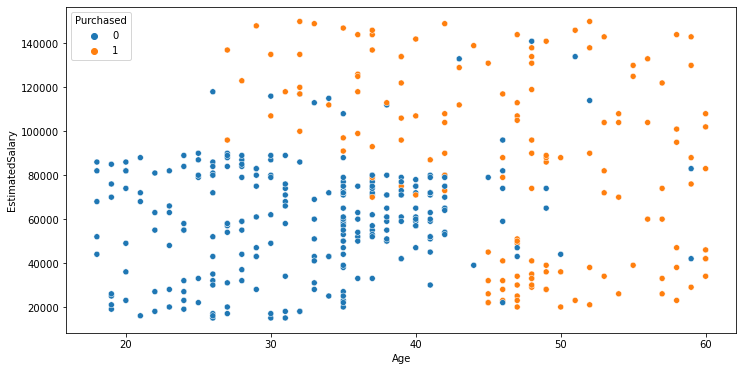

In [12]:
#plot
fig = plt.figure(figsize= (12,6))
sns.scatterplot(data = dataset, x = "Age", y = "EstimatedSalary", hue = "Purchased")

In [4]:
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

# Fitting Logistic Regression to the Training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [6]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [7]:
classifier.predict_proba(X_test)

array([[0.53055081, 0.46944919],
       [0.51942298, 0.48057702],
       [0.53481468, 0.46518532],
       [0.51710329, 0.48289671],
       [0.53881705, 0.46118295],
       [0.58286895, 0.41713105],
       [0.52774773, 0.47225227],
       [0.53873325, 0.46126675],
       [0.57351744, 0.42648256],
       [0.53182568, 0.46817432],
       [0.52233592, 0.47766408],
       [0.59913357, 0.40086643],
       [0.55414664, 0.44585336],
       [0.56955499, 0.43044501],
       [0.54222348, 0.45777652],
       [0.59731058, 0.40268942],
       [0.55045834, 0.44954166],
       [0.51706119, 0.48293881],
       [0.54661824, 0.45338176],
       [0.55885272, 0.44114728],
       [0.51708224, 0.48291776],
       [0.52683903, 0.47316097],
       [0.58859474, 0.41140526],
       [0.58139803, 0.41860197],
       [0.52543655, 0.47456345],
       [0.54065936, 0.45934064],
       [0.50207209, 0.49792791],
       [0.51216689, 0.48783311],
       [0.55673233, 0.44326767],
       [0.55626954, 0.44373046],
       [0.

<AxesSubplot:ylabel='Density'>

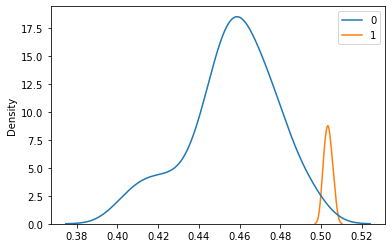

In [8]:
#threshold
sns.kdeplot(classifier.predict_proba(X_test)[:,1], hue = y_pred)

In [5]:
# Making the Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [31,  1]])

In [6]:
# Classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.94      0.79        68
           1       0.20      0.03      0.05        32

    accuracy                           0.65       100
   macro avg       0.44      0.49      0.42       100
weighted avg       0.52      0.65      0.55       100



In [30]:
# ROC
metrics.roc_auc_score(y_test, y_pred)

0.48621323529411764

In [5]:
classifier.intercept_

array([-0.00125004])

In [8]:
classifier.coef_

array([[-7.92194513e-03,  1.95940822e-06]])

In [9]:
def plot_classification_region(X_set, y_set, title, xlabel, ylabel):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    fig, ax = plt.subplots(figsize=(16,9))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [10]:
X_train

array([[    44, 139000],
       [    30,  62000],
       [    40,  57000],
       [    36, 118000],
       [    28,  37000],
       [    50,  44000],
       [    18,  68000],
       [    29,  80000],
       [    41,  72000],
       [    36, 144000],
       [    58,  38000],
       [    24,  55000],
       [    30,  49000],
       [    26,  43000],
       [    23,  66000],
       [    48, 141000],
       [    29,  75000],
       [    51, 134000],
       [    34,  43000],
       [    58, 101000],
       [    33, 113000],
       [    54, 104000],
       [    19,  21000],
       [    41,  52000],
       [    42,  73000],
       [    47,  25000],
       [    56, 133000],
       [    36,  54000],
       [    35,  38000],
       [    26,  81000],
       [    57,  60000],
       [    32,  86000],
       [    37,  33000],
       [    25,  80000],
       [    21,  68000],
       [    19,  70000],
       [    39,  59000],
       [    19,  25000],
       [    35,  72000],
       [    46,  28000],


In [ ]:
plot_classification_region(X_train,
                           y_train,
                           title = "Treino",
                           xlabel = "Age",
                           ylabel = "EstimatedSalary")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


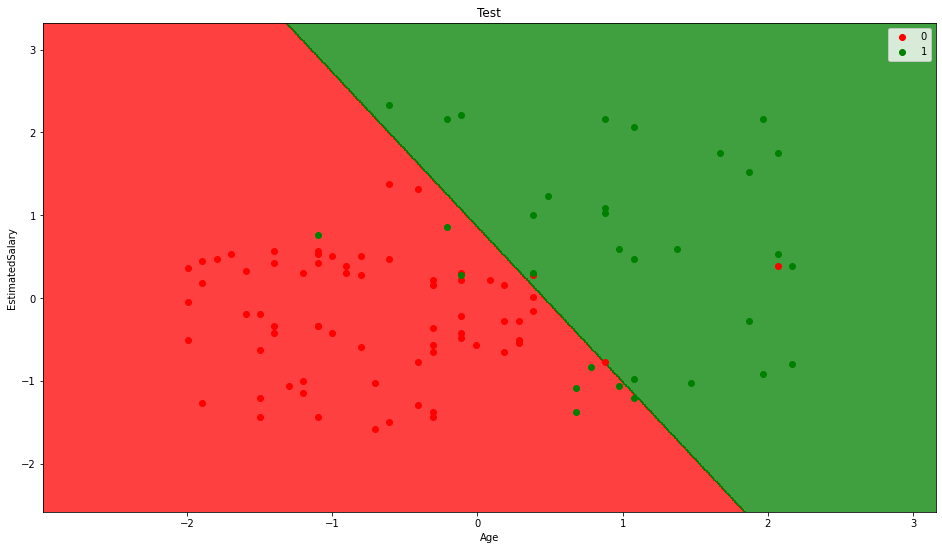

In [11]:
plot_classification_region(X_test,
                           y_test,
                           title = "Test",
                           xlabel = "Age",
                           ylabel = "EstimatedSalary")